In [118]:
import requests

api_key = "<YOUR_API_KEY>"

url = "https://www.googleapis.com/youtube/v3/search"


In [119]:
#Test API connection
params = {
    "key": api_key,
    "q": "iphone 16 Review",
    "maxResults": 5,
    
}

response = requests.get(url, params=params)

print(response.json())

{'kind': 'youtube#searchListResponse', 'etag': 'kZmYSrMZafdIzrs-Zg39V4IOPOE', 'nextPageToken': 'CDIQAA', 'regionCode': 'PT', 'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 50}, 'items': [{'kind': 'youtube#searchResult', 'etag': '0ld5e2iCrzUKojW_IOLtE6mILUQ', 'id': {'kind': 'youtube#video', 'videoId': 'aDqzDoJPkaA'}}, {'kind': 'youtube#searchResult', 'etag': 'eeVLWxqhh2f3tBpv42_Gh_2EOJg', 'id': {'kind': 'youtube#video', 'videoId': 'pKvrWcXUvfE'}}, {'kind': 'youtube#searchResult', 'etag': 'WKeRRXxj6018YQYygiVOD12_USM', 'id': {'kind': 'youtube#video', 'videoId': 'HYvzOlauRAw'}}, {'kind': 'youtube#searchResult', 'etag': '5epO-ket8-12d3bj9w4axerDYjM', 'id': {'kind': 'youtube#video', 'videoId': 'adExh65fKH0'}}, {'kind': 'youtube#searchResult', 'etag': 'GBerYyBAK9Kq1c8cCLpNAmbv3bc', 'id': {'kind': 'youtube#video', 'videoId': 'q6bnByTsKUE'}}, {'kind': 'youtube#searchResult', 'etag': '9pxEVDL0G9mU1hNpInQap-RTv0w', 'id': {'kind': 'youtube#video', 'videoId': 'MRtg6A1f2Ko'}}, {'kind': 'yo

In [120]:
import google_auth_oauthlib.flow
import googleapiclient.discovery

def get_authenticated_service():
    '''
    This function serves to authenticate the API connection. You will need to create a new APP on the google APP dashboard to get your API key.
    After getting your API key, you will also need to get your OAuth 2.0 credentials. Google provides an OAuth 2.0 client ID and client secret.
    set 'secrets' to the location of the googleusercontent.com.json sectrets file.
    This function returns a service object that is used in the get_video_stats() function.
    '''
    secrets = "C:\GitRepos\ReviewerReview\client_secret_159656662170-ithvki6hp7i4s76pminpud7kstc46il1.apps.googleusercontent.com.json"

    flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file( secrets, ["https://www.googleapis.com/auth/youtube.readonly"])
    credentials = flow.run_local_server(port=0)

    youtube = googleapiclient.discovery.build("youtube", "v3", credentials=credentials)

    return youtube

def get_video_stats(service, video_id):
    '''
    This function returns the video id, views, likes and comments of a video in a list.
    Provide the service object and the video id as arguments.
    The service object is created in the get_authenticated_service() function.
    '''
    ret = list()
    request = service.videos().list(
        part="snippet,statistics",
        id=video_id
    )
    response = request.execute()
    #print(response['items'][0]['statistics'])
    publish_date = response['items'][0]['snippet']['publishedAt']
    views = response['items'][0]['statistics'].get('viewCount', 0)
    likes = response['items'][0]['statistics'].get('likeCount', 0)
    comments = response['items'][0]['statistics'].get('commentCount', 0)
    ret = [video_id, views, likes, comments, publish_date]
    return ret



In [121]:
service = get_authenticated_service()
#Run this to obtain the service object that allows for API calls. You will need to login to a google account registered to your app.


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=159656662170-ithvki6hp7i4s76pminpud7kstc46il1.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A56847%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly&state=ZF9ZxO9OOPXND8YmWOmx5Fzk65SPGJ&access_type=offline


In [122]:
# Create iphone name list

iphone_list = list()
iphone_list.append("iPhone 8")
iphone_list.append("iPhone X")

for i in range(11,17):
    iphone_list.append("iPhone " + str(i))
    
print(iphone_list)


['iPhone 8', 'iPhone X', 'iPhone 11', 'iPhone 12', 'iPhone 13', 'iPhone 14', 'iPhone 15', 'iPhone 16']


In [123]:
#General iPhone info

iphone_release_years = [
    2017,  # iPhone 8 
    2018,  # iPhone X
    2019,  # iPhone 11
    2020,  # iPhone 12
    2021,  # iPhone 13
    2022,  # iPhone 14
    2023,   # iPhone 15
    2024,   # iPhone 16
]

iphone_sales_data = [ #in Milions
    213.3, # iPhone 8 
    208.8, # iPhone X 
    191.0, # iPhone 11 
    206.1, # iPhone 12 
    233.9, # iPhone 13 
    225.3, # iPhone 14
    231.8, # iPhone 15 
    0.0    # iPhone 16 - just released 
]    #https://www.statista.com/statistics/299153/apple-smartphone-shipments-worldwide/


In [147]:
#Main loop - This will fecth 25 videos for each iphone and then get the stats for each video

big_list = list()

for iphone in iphone_list:
    params = {
        "key": api_key,
        "q": iphone + " Review",
        "maxResults": 25,
        "type": "video"
    }
    response = requests.get(url, params=params)
    if response.json() == None:
        continue

    json = response.json()
    print(json)
    row = []
    for res in json.get('items'):
        stats = get_video_stats(service, res['id']['videoId'])
        row.append(iphone)
        row.extend(stats)
        big_list.append(row.copy())
        row = []
    
print(big_list)
    

    


{'kind': 'youtube#searchListResponse', 'etag': 'dmSJwWMb-Rg98tKrbPWZtxXZHZw', 'nextPageToken': 'CBkQAA', 'regionCode': 'PT', 'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 25}, 'items': [{'kind': 'youtube#searchResult', 'etag': 'thu_-jcbSp6bW0D3FKP-fvh2fh0', 'id': {'kind': 'youtube#video', 'videoId': 'ld5H2L4j6LE'}}, {'kind': 'youtube#searchResult', 'etag': 'NW6ut9YQ8xV8NqWQerKL__Cb23A', 'id': {'kind': 'youtube#video', 'videoId': 'G4TmZ8ReHCY'}}, {'kind': 'youtube#searchResult', 'etag': '43BoMSOIxGNOlzQOdyndhxVnxmU', 'id': {'kind': 'youtube#video', 'videoId': 'FRGy-HjfnA8'}}, {'kind': 'youtube#searchResult', 'etag': 'vbVHeyJr2UpqAHTkqbgTzEo6K5k', 'id': {'kind': 'youtube#video', 'videoId': 'HRiLaFDeGtQ'}}, {'kind': 'youtube#searchResult', 'etag': 'KkI7JhXsBm4YSY9Atb5KymLh0J4', 'id': {'kind': 'youtube#video', 'videoId': '03rbt3BVcXc'}}, {'kind': 'youtube#searchResult', 'etag': '5MlpN2v0hTuUbP1rcSR-dMpnIgg', 'id': {'kind': 'youtube#video', 'videoId': 'zj7FotGbIbE'}}, {'kind': 'yo

In [ ]:
# This function was used to test the visualization and dataframe manipulations before calling the API

dumb_list = list()
import random

def randomstats():
    video_id = (random.randint(0, 100000000))
    views = (random.randint(0, 100000))
    comments = (random.randint(0, 1000))
    likes = (random.randint(0, 10000))
    publish_date = (random.randint(2017, 2024))
    ret = [video_id, views, likes, comments, publish_date]
    print(ret)
    return ret

row = []
for iphone in iphone_list:
    for i in range(0, 5):
        stats=randomstats()
        row.append(iphone)
        row.extend(stats)
        dumb_list.append(row.copy())
        row = []
    
print(dumb_list)

In [148]:
import pandas as pd

#Creates the main df

df_list = big_list

df = pd.DataFrame(df_list, columns = ['product_name', 'video_id','views','likes','comments','publish_date'])
print(df)


    product_name     video_id    views   likes comments          publish_date
0       iPhone 8  ld5H2L4j6LE  5336356  107895     8711  2017-09-30T02:37:31Z
1       iPhone 8  G4TmZ8ReHCY   317030    4449      665  2023-07-28T18:59:16Z
2       iPhone 8  FRGy-HjfnA8    75731     998      189  2024-01-04T20:00:10Z
3       iPhone 8  HRiLaFDeGtQ   836199    7974      613  2017-09-25T14:52:28Z
4       iPhone 8  03rbt3BVcXc    16412     216       33  2024-06-02T13:30:00Z
..           ...          ...      ...     ...      ...                   ...
195    iPhone 16  JjtEcqSfd18     1085      30        0  2024-10-15T18:15:00Z
196    iPhone 16  -C2NlXPMKXQ    36608     503       56  2024-10-09T14:45:00Z
197    iPhone 16  mIpQfskRt7Y    35532     857      228  2024-10-12T21:03:22Z
198    iPhone 16  0DL_DAdm108   825198   17841     1478  2024-09-18T12:00:01Z
199    iPhone 16  xf5U_eixb7w    72654     705       94  2024-09-20T13:01:08Z

[200 rows x 6 columns]


In [158]:
# Stores a safe copy of the df for emergencies only

safe_copy = df.copy()

In [150]:
# Removes duplicate, converts numerical columns to int, and calculates like and comment rates

df.drop_duplicates(inplace=True)
df.views = df.views.astype(int)
df.likes = df.likes.astype(int)
df.comments = df.comments.astype(int)

df['like_rate'] = df.likes/df.views*100
df['comm_rate'] = df.comments/df.views*100

df


,product_name,video_id,views,likes,comments,publish_date,like_rate,comm_rate
0,iPhone 8,ld5H2L4j6LE,5336356,107895,8711,2017-09-30T02:37:31Z,2.021885,0.163239
1,iPhone 8,G4TmZ8ReHCY,317030,4449,665,2023-07-28T18:59:16Z,1.403337,0.209759
2,iPhone 8,FRGy-HjfnA8,75731,998,189,2024-01-04T20:00:10Z,1.317822,0.249568
3,iPhone 8,HRiLaFDeGtQ,836199,7974,613,2017-09-25T14:52:28Z,0.953601,0.073308
4,iPhone 8,03rbt3BVcXc,16412,216,33,2024-06-02T13:30:00Z,1.316110,0.201072
...,...,...,...,...,...,...,...,...
195,iPhone 16,JjtEcqSfd18,1085,30,0,2024-10-15T18:15:00Z,2.764977,0.000000
196,iPhone 16,-C2NlXPMKXQ,36608,503,56,2024-10-09T14:45:00Z,1.374017,0.152972
197,iPhone 16,mIpQfskRt7Y,35532,857,228,2024-10-12T21:03:22Z,2.411910,0.641675
198,iPhone 16,0DL_DAdm108,825198,17841,1478,2024-09-18T12:00:01Z,2.162027,0.179109


In [222]:
avg_views = 0
view_rate_list = list()
view_rate_list.append(0.0)
comm_ratio = list()
like_ratio = list()
for iphone in iphone_list:
    prev_avg = avg_views
    df_iphone = df[df['product_name'] == iphone]
    avg_views = df_iphone['views'].mean()
    df_likes = df_iphone[df_iphone['likes'] > 0].copy()
    avg_likes = df_likes['likes'].mean()
    df_comments = df_iphone[df_iphone['comments'] > 0].copy()
    avg_comments = df_iphone['comments'].mean()
    print(avg_views)
    i = iphone_list.index(iphone)
    
    #comment to view ratio
    
    comm_ratio.append(df_comments['comm_rate'].mean())
    
    #like ratio
    
    like_ratio.append(df_likes['like_rate'].mean())
    
    #view_rate_list
    if i == 0:
        continue
    else:
        rate = (avg_views - prev_avg)/prev_avg*100
        view_rate_list.append(rate)
        if avg_views > prev_avg:
            print(f"{rate}% increase in {iphone} views")
        else:
            print(f"{rate}% decrease in {iphone} views")
    
    

view_rate_list
#comm_ratio
#like_ratio

3909732.24
2958815.12
-24.32179652282275% decrease in iPhone X views
1603036.24
-45.821682836337544% decrease in iPhone 11 views
1990933.76
24.197676279608% increase in iPhone 12 views
4176623.08
109.7821215307535% increase in iPhone 13 views
2085064.28
-50.07774845701422% decrease in iPhone 14 views
2784053.88
33.52364752994569% increase in iPhone 15 views
1279280.24
-54.04973125017249% decrease in iPhone 16 views


[0.0,
 -24.32179652282275,
 -45.821682836337544,
 24.197676279608,
 109.7821215307535,
 -50.07774845701422,
 33.52364752994569,
 -54.04973125017249]

In [223]:
sales_df = pd.DataFrame(list(zip(iphone_list, iphone_sales_data, iphone_release_years)), columns =['product_name', 'sales', 'release_year'])
print(sales_df)

rate_list = list()
rate_list.append(0.0)
for i in range(len(sales_df)-1):
    if i == 0:
        continue
    else:
        rate = (sales_df['sales'][i] - sales_df['sales'][i-1])/sales_df['sales'][i-1]*100
        rate_list.append(rate)
        if sales_df['sales'][i] > sales_df['sales'][i-1]:
            print(f"{rate}% increase in {sales_df['product_name'][i]} sales")
        else:
            print(f"{rate}% decrease in {sales_df['product_name'][i]} sales")
rate_list.append(0.0)




  product_name  sales  release_year
0     iPhone 8  213.3          2017
1     iPhone X  208.8          2018
2    iPhone 11  191.0          2019
3    iPhone 12  206.1          2020
4    iPhone 13  233.9          2021
5    iPhone 14  225.3          2022
6    iPhone 15  231.8          2023
7    iPhone 16    0.0          2024
-2.109704641350211% decrease in iPhone X sales
-8.524904214559392% decrease in iPhone 11 sales
7.905759162303662% increase in iPhone 12 sales
13.488597768073756% increase in iPhone 13 sales
-3.676784950833687% decrease in iPhone 14 sales
2.8850421660008876% increase in iPhone 15 sales


In [224]:
sales_df['sales_rate'] = rate_list
#print(view_rate_list)
sales_df["view_rate"] = view_rate_list
sales_df["comment_ratio"] = comm_ratio
sales_df["like_ratio"] = like_ratio
print(sales_df)


  product_name  sales  release_year  sales_rate   view_rate  comment_ratio  \
0     iPhone 8  213.3          2017    0.000000    0.000000       0.124103   
1     iPhone X  208.8          2018   -2.109705  -24.321797       0.188202   
2    iPhone 11  191.0          2019   -8.524904  -45.821683       0.503688   
3    iPhone 12  206.1          2020    7.905759   24.197676       0.171569   
4    iPhone 13  233.9          2021   13.488598  109.782122       0.164769   
5    iPhone 14  225.3          2022   -3.676785  -50.077748       0.149758   
6    iPhone 15  231.8          2023    2.885042   33.523648       0.146965   
7    iPhone 16    0.0          2024    0.000000  -54.049731       0.373423   

   like_ratio  
0    2.060981  
1    1.962479  
2    2.057910  
3    2.562591  
4    3.043315  
5    2.183424  
6    2.788117  
7    2.436717  


<Axes: xlabel='product_name', ylabel='sales'>

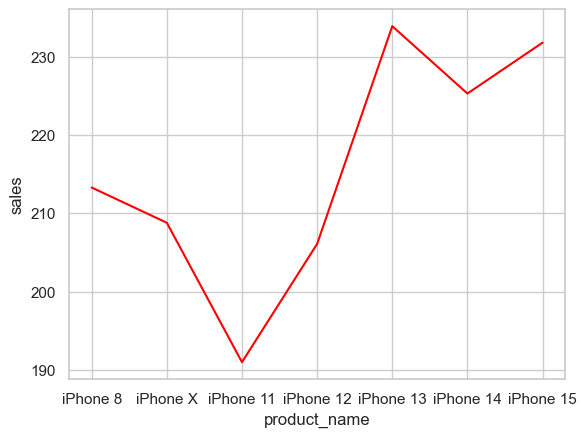

In [225]:
import seaborn as sns

sns.lineplot(x="product_name", y="sales", data=sales_df[sales_df.product_name != 'iPhone 16'], color='red')


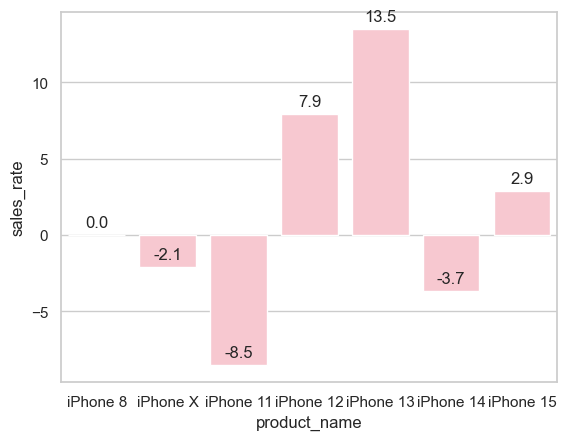

In [226]:
barplot = sns.barplot(x="product_name", y="sales_rate", data=sales_df[sales_df.product_name != 'iPhone 16'], color='pink')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), # 9 points vertical offset
                     textcoords = 'offset points')

<Axes: xlabel='product_name', ylabel='view_rate'>

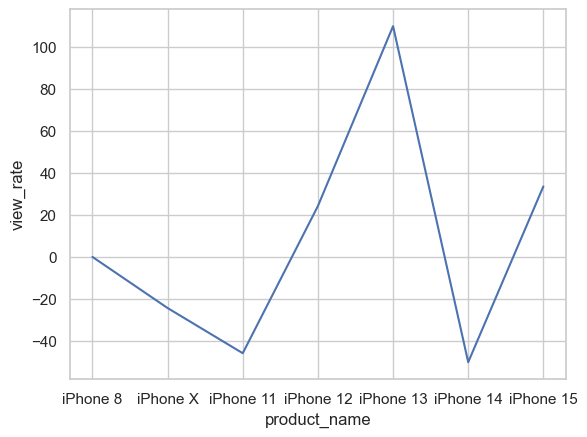

In [227]:

sns.lineplot(x="product_name", y="view_rate", data=sales_df[sales_df.product_name != 'iPhone 16'])


<Axes: xlabel='product_name', ylabel='comment_ratio'>

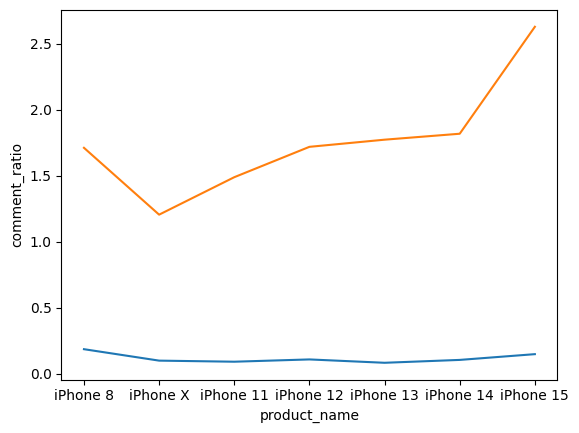

In [133]:
sns.lineplot(x="product_name", y="comment_ratio", data=sales_df[sales_df.product_name != 'iPhone 16'])
sns.lineplot(x="product_name", y="like_ratio", data=sales_df[sales_df.product_name != 'iPhone 16'])

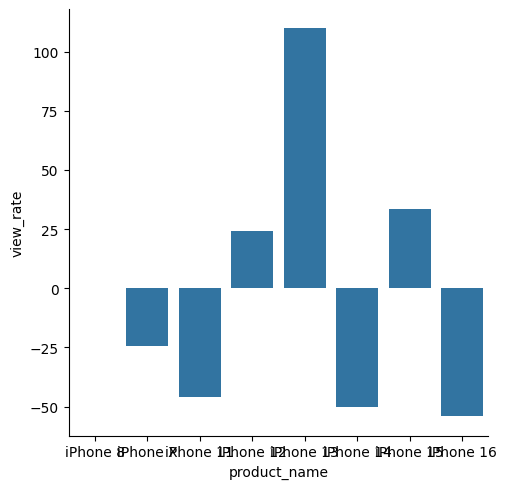

In [166]:
sns.catplot(x="product_name", y="view_rate", data=sales_df, kind='bar')
#sns.barplot(x="product_name", y="sales_rate", data=sales_df[sales_df.product_name != 'iPhone 16'])

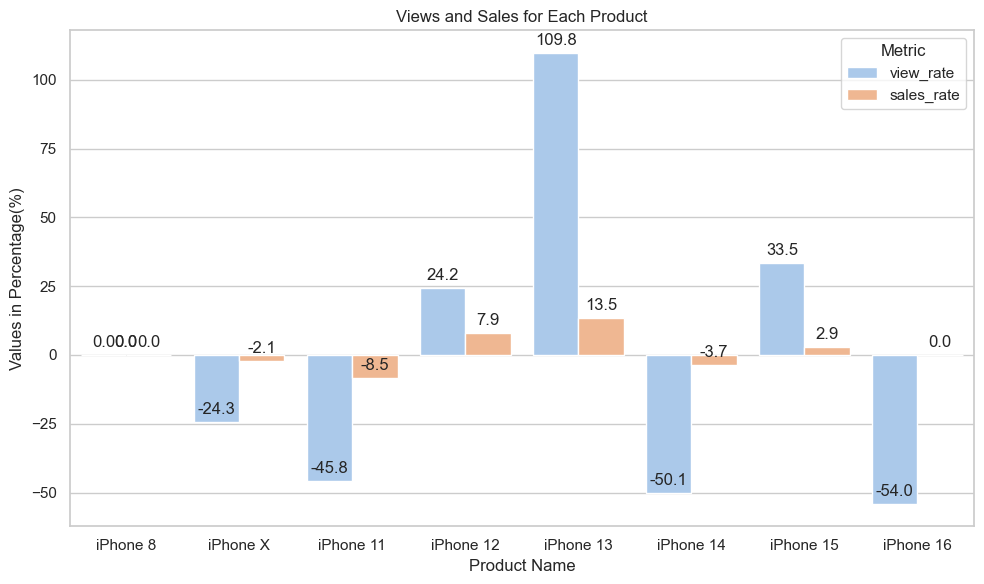

In [206]:
import matplotlib.pyplot as plt

df_filt = sales_df.filter(items=['product_name', 'view_rate', 'sales_rate'])

df_melted = pd.melt(df_filt, id_vars='product_name', var_name='metric', value_name='value')

# Set the style of the visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))  
# Create the bar plot
barplot= sns.barplot(data=df_melted, x='product_name', y='value', hue='metric',palette='pastel')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), # 9 points vertical offset
                     textcoords = 'offset points')
    
# Customize the plot
plt.title('Views and Sales for Each Product')
plt.xlabel('Product Name')
plt.ylabel('Values in Percentage(%)')  
plt.legend(title='Metric')
plt.tight_layout()
# Display the plot
plt.show()

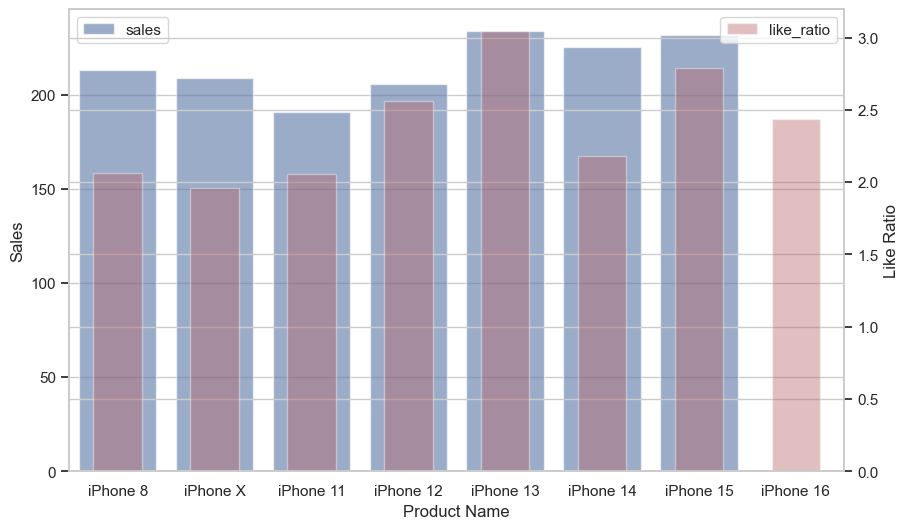

In [230]:
normalize_df = sales_df.copy()

df_filt = normalize_df.filter(items=['product_name', 'like_ratio','sales'])

df_melted = pd.melt(df_filt, id_vars='product_name', var_name='metric', value_name='value')

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the view rates on the primary y-axis
sns.barplot(x='product_name', y='sales', data=normalize_df, ax=ax1, color='b', alpha=0.6, label='sales')

# Create a secondary y-axis and plot the sales values
ax2 = ax1.twinx()  # This creates a new y-axis that shares the same x-axis
sns.barplot(x='product_name', y='like_ratio', data=normalize_df, ax=ax2, color='r', alpha=0.4, label='like_ratio', width=0.5)

# Customize the axes
ax1.set_ylabel('Sales')
ax2.set_ylabel('Like Ratio')
ax1.set_xlabel('Product Name')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [252]:
topten_df = safe_copy.copy()
topten_df.drop(['video_id','publish_date','like_rate','comm_rate'], axis=1, inplace=True)
final_df = pd.DataFrame(columns=topten_df.columns)
row = list()
i=0
for iphone in topten_df.product_name.unique():
    row=[]
    temp_df = (topten_df[topten_df.product_name == iphone].sort_values(by=['views'], ascending=False).head(10))
    row.append(iphone)
    row.append(temp_df['views'].astype(float).mean())
    row.append(temp_df['likes'].astype(float).mean()/temp_df['views'].astype(float).mean()*100)
    row.append(temp_df['comments'].astype(float).mean()/temp_df['views'].astype(float).mean()*100)
    print(row)
    
    final_df = pd.concat([final_df, pd.DataFrame([row], columns=final_df.columns)])

final_df['sales'] = iphone_sales_data    
print(final_df)
    




['iPhone 8', 9218400.5, 5.242931243874684, 0.0639980873037573]
['iPhone X', 6851105.5, 1.951909804921264, 0.2281237677627355]
['iPhone 11', 3439981.4, 2.117970754144194, 0.12282624551400191]
['iPhone 12', 4645905.5, 2.8644642040179247, 0.1737443863203847]
['iPhone 13', 9982195.7, 5.177644433478699, 0.06422033981962506]
['iPhone 14', 4782200.3, 3.7110344374324935, 0.11172890437065133]
['iPhone 15', 6598052.8, 4.977609454716701, 0.07995692304856973]
['iPhone 16', 3144141.2, 2.8486570514072334, 0.23242276778154872]
  product_name      views     likes  comments  sales
0     iPhone 8  9218400.5  5.242931  0.063998  213.3
0     iPhone X  6851105.5  1.951910  0.228124  208.8
0    iPhone 11  3439981.4  2.117971  0.122826  191.0
0    iPhone 12  4645905.5  2.864464  0.173744  206.1
0    iPhone 13  9982195.7  5.177644  0.064220  233.9
0    iPhone 14  4782200.3  3.711034  0.111729  225.3
0    iPhone 15  6598052.8  4.977609  0.079957  231.8
0    iPhone 16  3144141.2  2.848657  0.232423    0.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23200\4201062186.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, pd.DataFrame([row], columns=final_df.columns)])


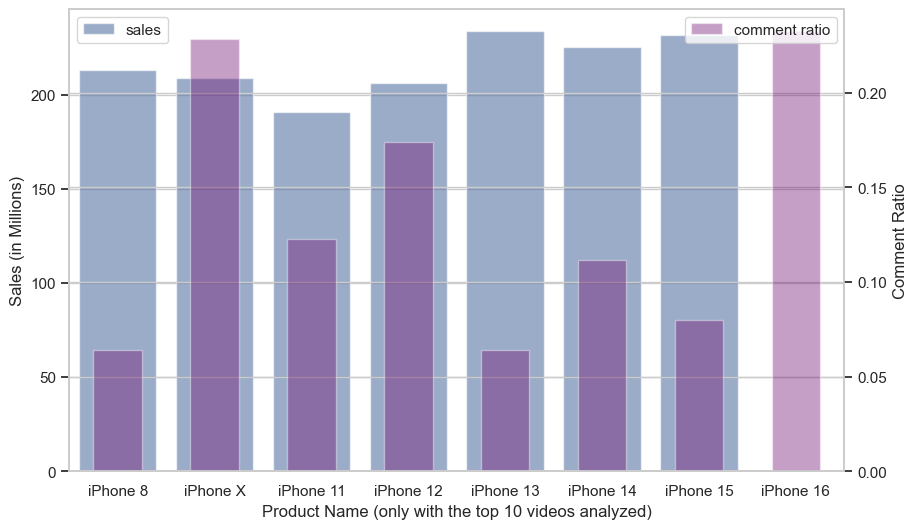

In [264]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the view rates on the primary y-axis
sns.barplot(x='product_name', y='sales', data=final_df, ax=ax1, color='b', alpha=0.6, label='sales')

# Create a secondary y-axis and plot the sales values
ax2 = ax1.twinx()  # This creates a new y-axis that shares the same x-axis
sns.barplot(x='product_name', y='comments', data=final_df, ax=ax2, color='purple', alpha=0.4, label='comment ratio', width=0.5)

# Customize the axes
ax1.set_ylabel('Sales (in Millions)')
ax2.set_ylabel('Comment Ratio')
ax1.set_xlabel('Product Name (only with the top 10 videos analyzed)')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

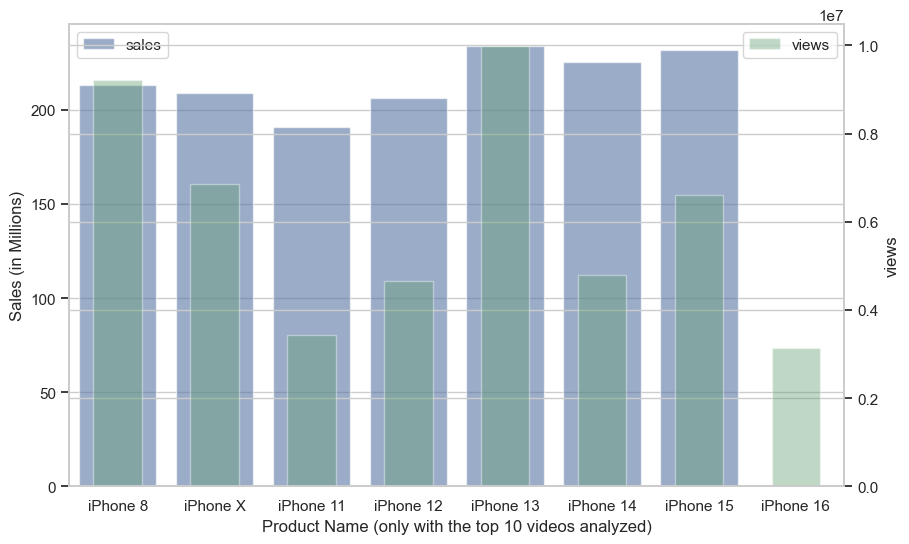

In [266]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the view rates on the primary y-axis
sns.barplot(x='product_name', y='sales', data=final_df, ax=ax1, color='b', alpha=0.6, label='sales')

# Create a secondary y-axis and plot the sales values
ax2 = ax1.twinx()  # This creates a new y-axis that shares the same x-axis
sns.barplot(x='product_name', y='views', data=final_df, ax=ax2, color='g', alpha=0.4, label='views', width=0.5)

# Customize the axes
ax1.set_ylabel('Sales (in Millions)')
ax2.set_ylabel('views')
ax1.set_xlabel('Product Name (only with the top 10 videos analyzed)')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()